In [1]:
import requests
import zipfile
import os
import pandas as pd
import dask.dataframe as dd
import warnings
import shutil

# 抑制 FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# 远程文件的 URL
url = 'https://fema.gov/about/reports-and-data/openfema/nfirs_fire_hazmat_pdr_2022.zip'

# 本地保存的文件名
local_zip_file = 'nfirs_fire_hazmat_pdr_2022.zip'

# 第一级解压缩后的文件夹名
first_extracted_folder = 'nfirs_fire_hazmat_pdr_2022'

# 第二级解压缩后的文件夹名
second_extracted_folder = os.path.join(first_extracted_folder, 'NFIRS_FIRES_2022_102623')

# 下载文件
response = requests.get(url)
with open(local_zip_file, 'wb') as f:
    f.write(response.content)
print(f"Downloaded {local_zip_file}")

# 解压缩第一级文件
with zipfile.ZipFile(local_zip_file, 'r') as zip_ref:
    zip_ref.extractall(first_extracted_folder)
print(f"Extracted files to {first_extracted_folder}")

# 解压缩第二级文件
second_zip_file = os.path.join(first_extracted_folder, 'nfirs_fire_hazmat_pdr_2022', 'NFIRS_FIRES_2022_102623.zip')
with zipfile.ZipFile(second_zip_file, 'r') as zip_ref:
    zip_ref.extractall(second_extracted_folder)
print(f"Extracted files to {second_extracted_folder}")

# 列出解压后的目录结构
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{subindent}{f}")

list_files(second_extracted_folder)


Downloaded nfirs_fire_hazmat_pdr_2022.zip
Extracted files to nfirs_fire_hazmat_pdr_2022
Extracted files to nfirs_fire_hazmat_pdr_2022/NFIRS_FIRES_2022_102623
NFIRS_FIRES_2022_102623/
    incidentaddress.txt
    full_civiliancasualty.csv
    merged_data.csv
    fireincident.txt
    merged_casualty_data.csv
    civiliancasualty.txt
    intermediate_civiliancasualty.csv
    hazchem.txt
    arson.txt
    basicincident.txt
    hazmat.txt
    wildlands.txt
    arsonjuvsub.txt
    ems.txt
    hazmatequipinvolved.txt
    codelookup.txt
    ffcasualty.txt
    fdheader.txt
    hazmobprop.txt
    basicaid.txt
    ffequipfail.txt
    filtered_basicincident.csv
    count_civiliancasualty.txt
    arsonagencyreferal.txt


In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def process_and_visualize_ffcasualty():
    ffcasualty_file_path = os.path.join(second_extracted_folder, 'ffcasualty.txt')
    if os.path.exists(ffcasualty_file_path):
        # 使用 pandas 读取文件，指定分隔符为 '^' 和编码为 'latin1'
        try:
            ffcasualty_df = pd.read_csv(ffcasualty_file_path, delimiter='^', encoding='latin1')
             
            # 异常值清理：清理“AGE”列中小于15或大于100的值
            if 'AGE' in ffcasualty_df.columns:
                ffcasualty_df = ffcasualty_df[(ffcasualty_df['AGE'] >= 15) & (ffcasualty_df['AGE'] <= 100)]
            
            # 打印清理后的数据
            print(ffcasualty_df.head())
            
            # 生成可视化图表
            visualize_data(ffcasualty_df)
        
        except UnicodeDecodeError as e:
            print(f"Error reading the ff casualty file with 'latin1' encoding: {e}")
    else:
        print(f"Error: The ff casualty file at path {ffcasualty_file_path} does not exist.")


                 INCIDENT_KEY STATE   FDID  INC_DATE  INC_NO  EXP_NO  \
0  AK_11100_05222022_223075_0    AK  11100   5222022  223075       0   
1  AK_11100_11262022_227808_0    AK  11100  11262022  227808       0   
2  AK_11100_11262022_227808_0    AK  11100  11262022  227808       0   
3  AK_11100_11262022_227808_0    AK  11100  11262022  227808       0   
4  AK_11100_12202022_228285_0    AK  11100  12202022  228285       0   

   FF_SEQ_NO  VERSION  GENDER  CAREER  ...  PABI  CAUSE  FACTOR  OBJECT WIO  \
0          1      5.0       1     1.0  ...    61      7     NaN      27   6   
1          1      5.0       2     1.0  ...    73      6      54      13   5   
2          2      5.0       1     1.0  ...    10      6      UU      UU   6   
3          3      5.0       2     2.0  ...    65      0      UU      43   6   
4          1      5.0       1     1.0  ...    65      6     NaN      32   6   

  RELATION STORY LOCATION VEHICLE PROT_EQP  
0      NaN   NaN      NaN     NaN        N  
1 

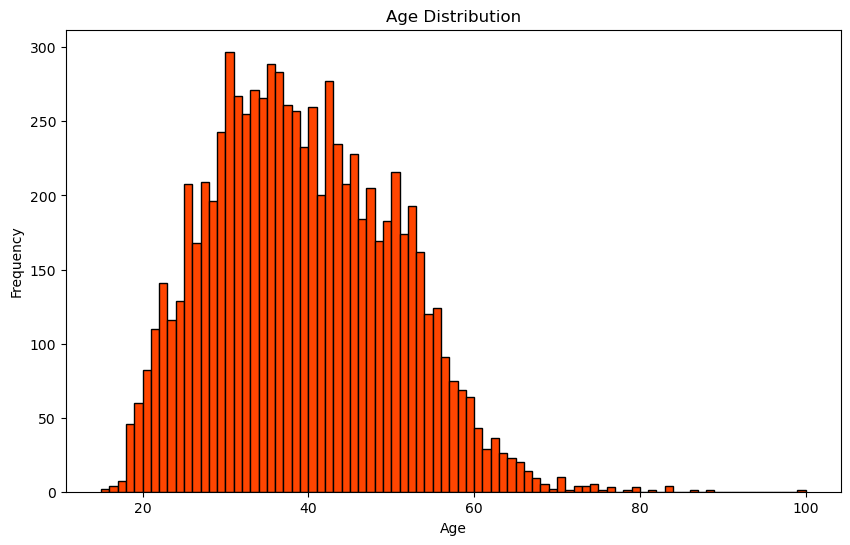

Saved age distribution histogram to /home/jovyan/work/004DISSERTATION/ff_visualization/age_distribution.png


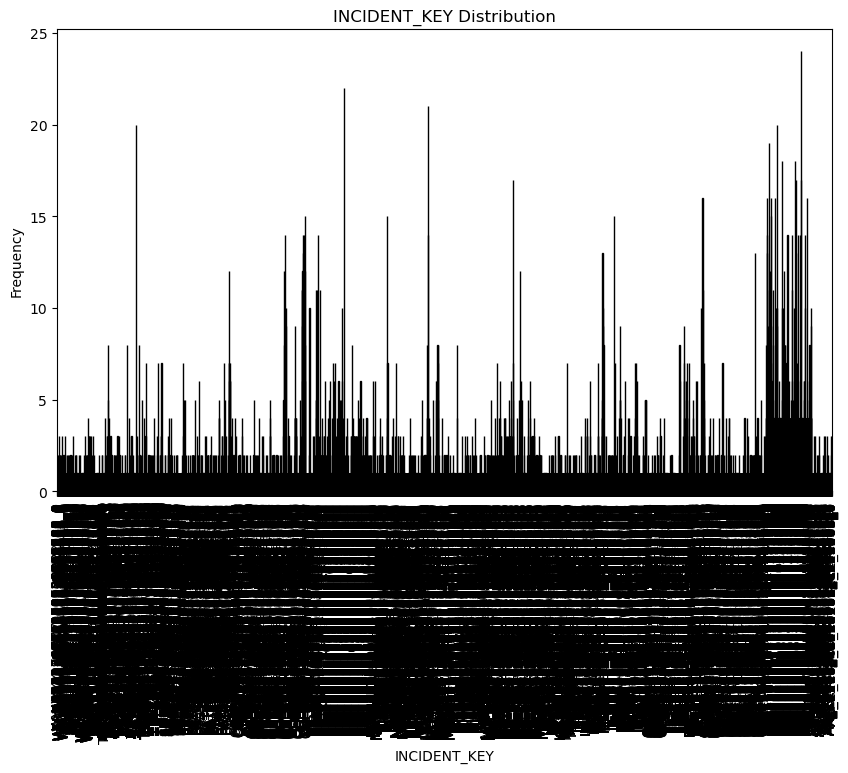

Saved INCIDENT_KEY distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/INCIDENT_KEY_distribution.png


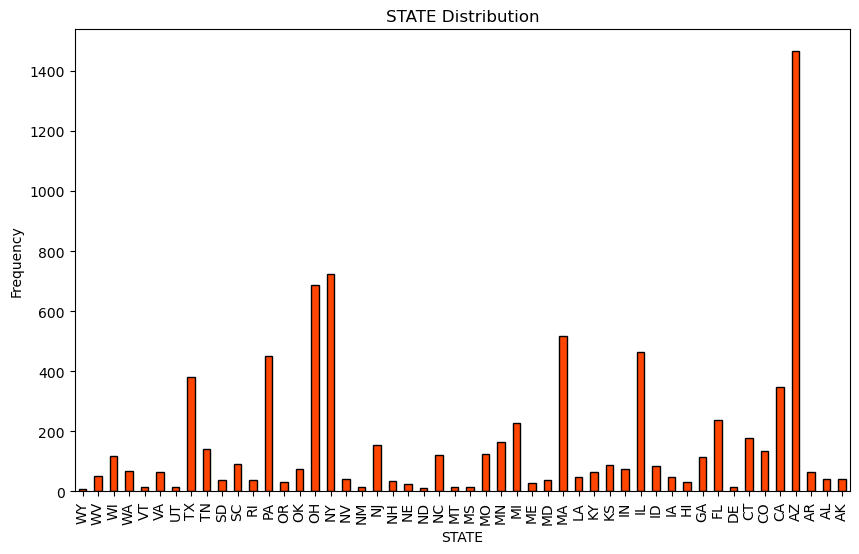

Saved STATE distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/STATE_distribution.png


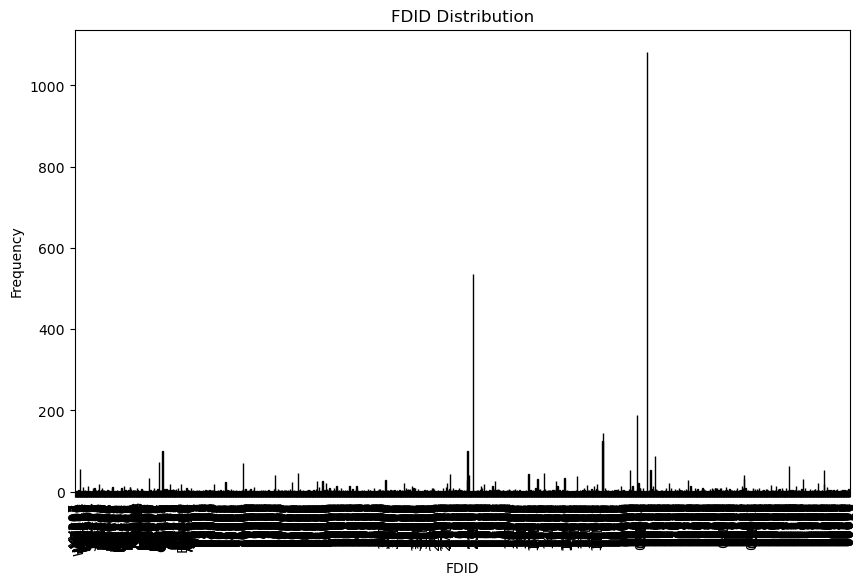

Saved FDID distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/FDID_distribution.png


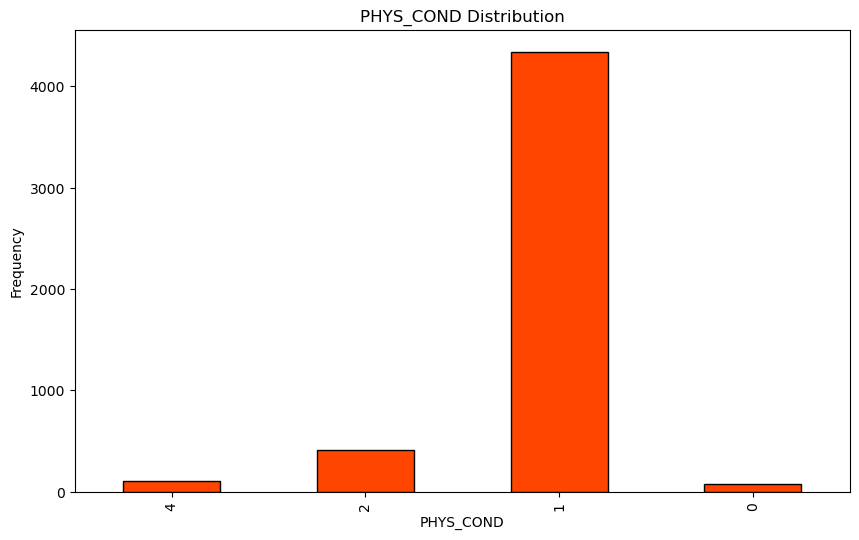

Saved PHYS_COND distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/PHYS_COND_distribution.png


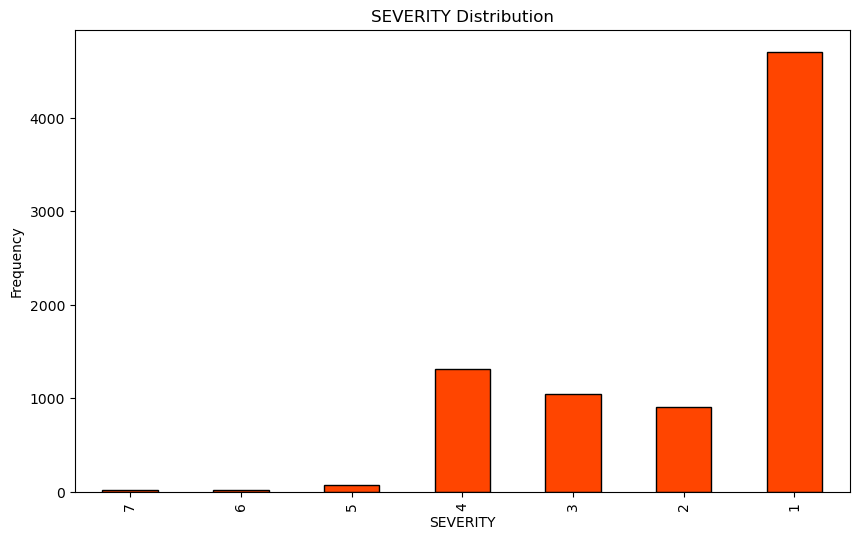

Saved SEVERITY distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/SEVERITY_distribution.png


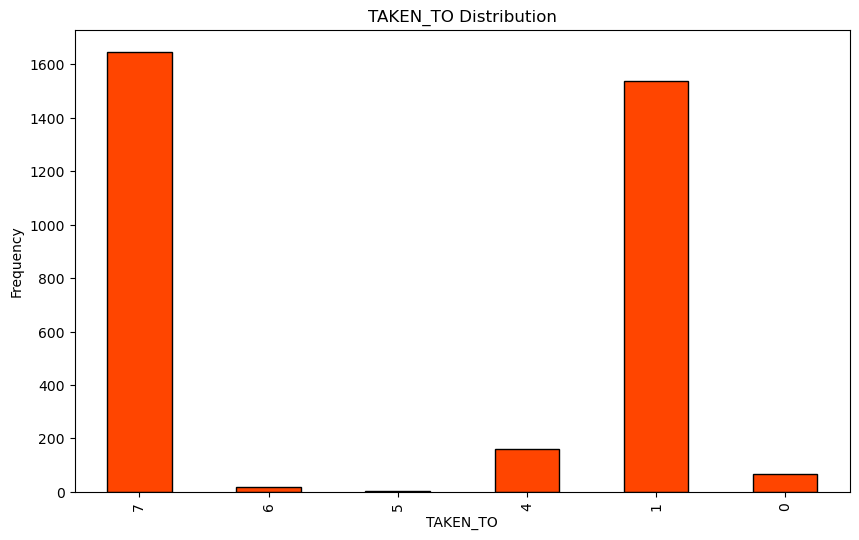

Saved TAKEN_TO distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/TAKEN_TO_distribution.png


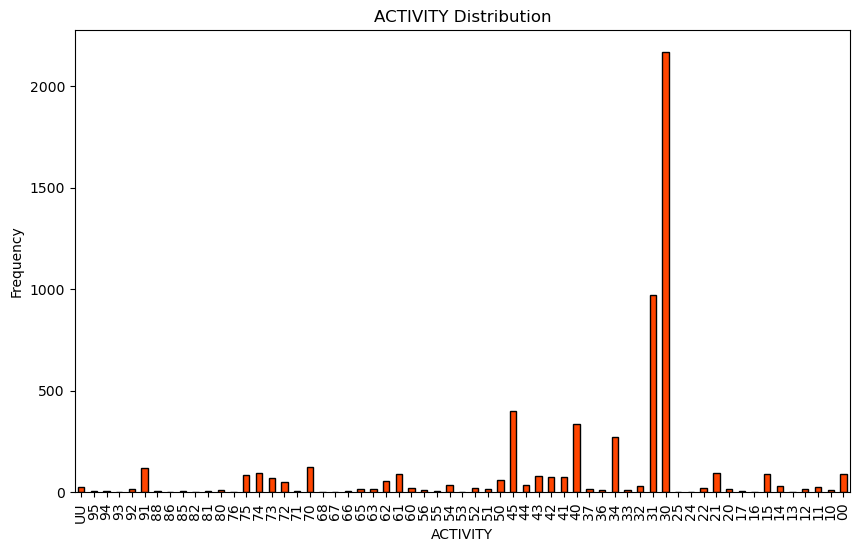

Saved ACTIVITY distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/ACTIVITY_distribution.png


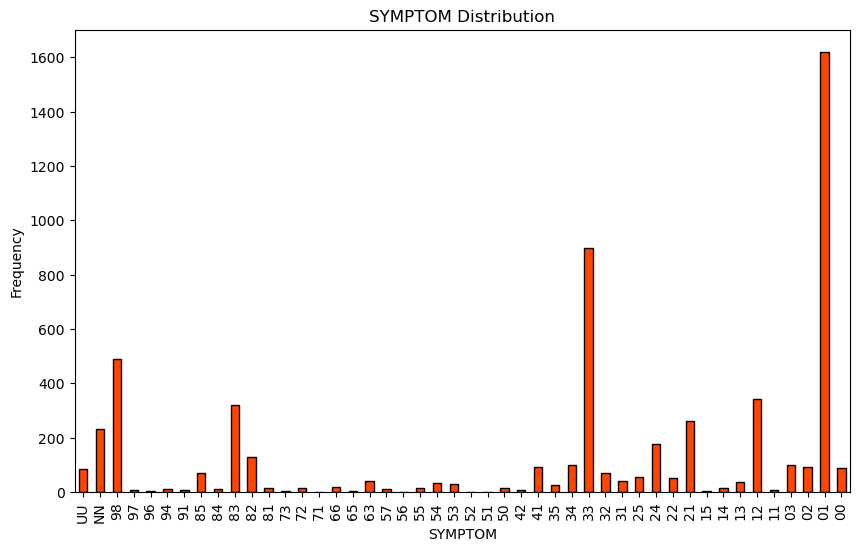

Saved SYMPTOM distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/SYMPTOM_distribution.png


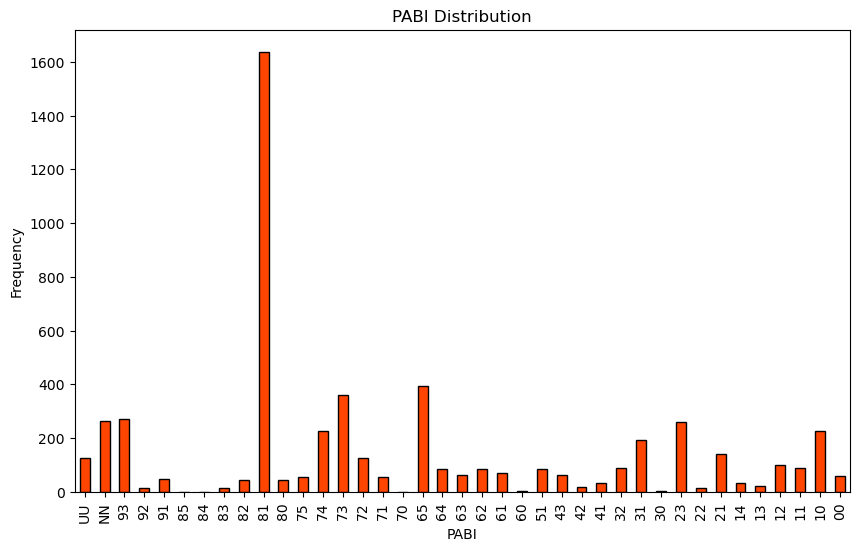

Saved PABI distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/PABI_distribution.png


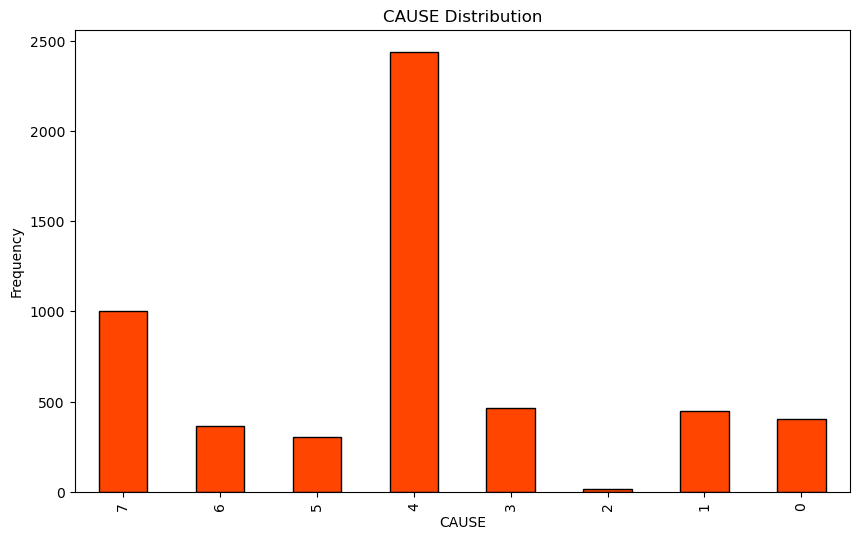

Saved CAUSE distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/CAUSE_distribution.png


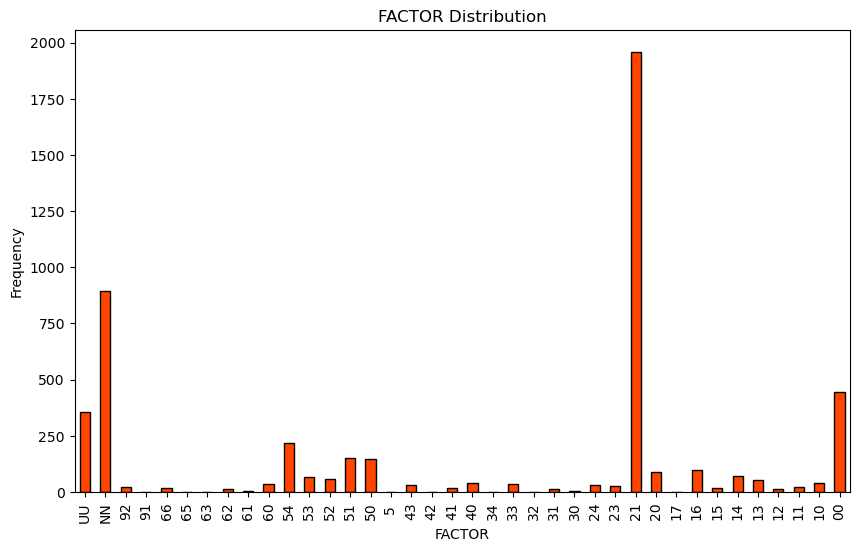

Saved FACTOR distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/FACTOR_distribution.png


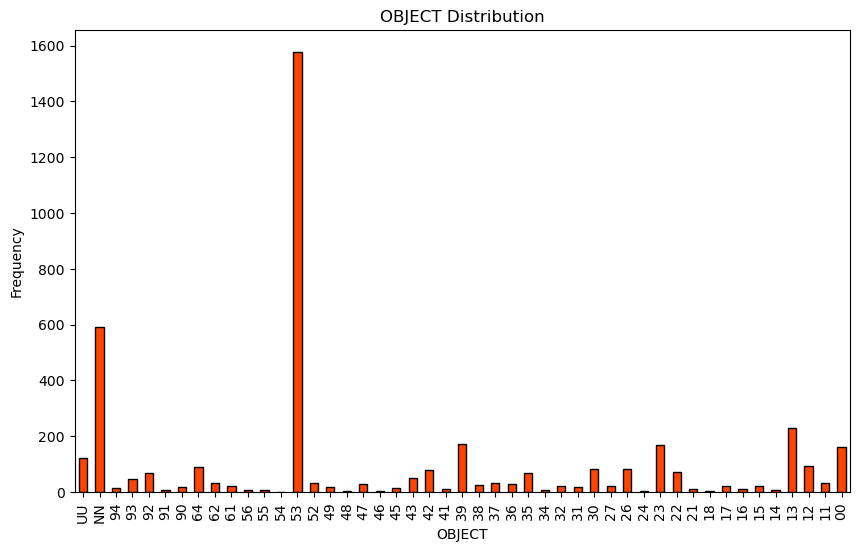

Saved OBJECT distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/OBJECT_distribution.png


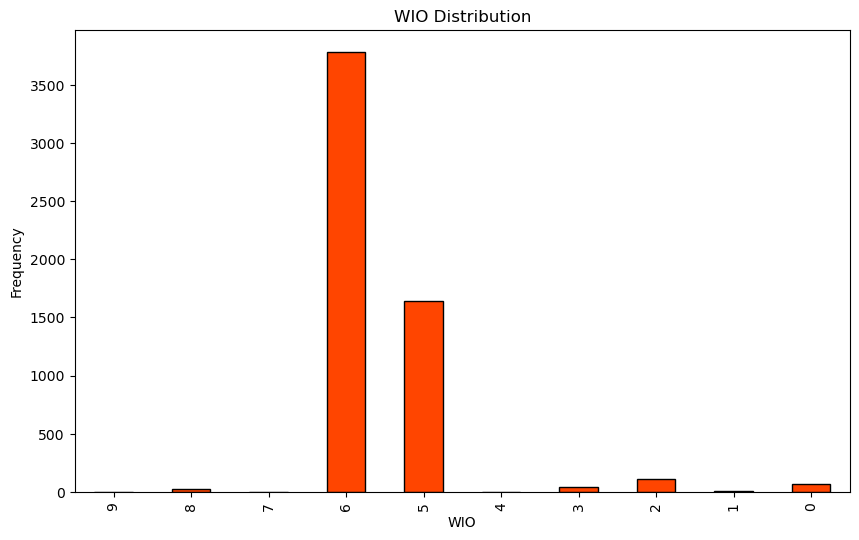

Saved WIO distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/WIO_distribution.png


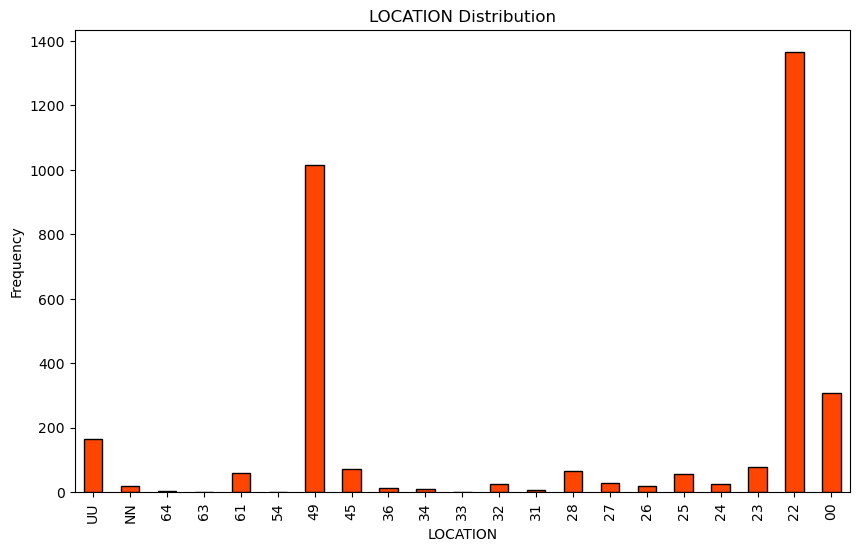

Saved LOCATION distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/LOCATION_distribution.png


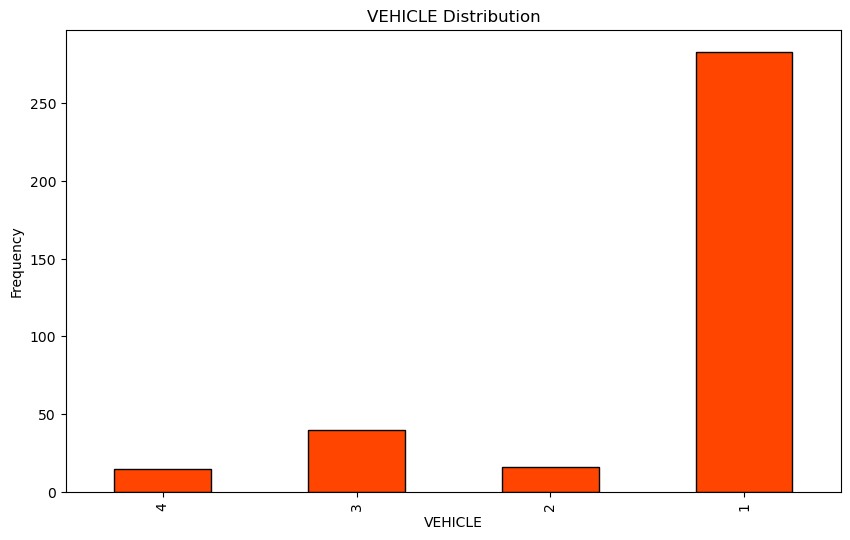

Saved VEHICLE distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/VEHICLE_distribution.png


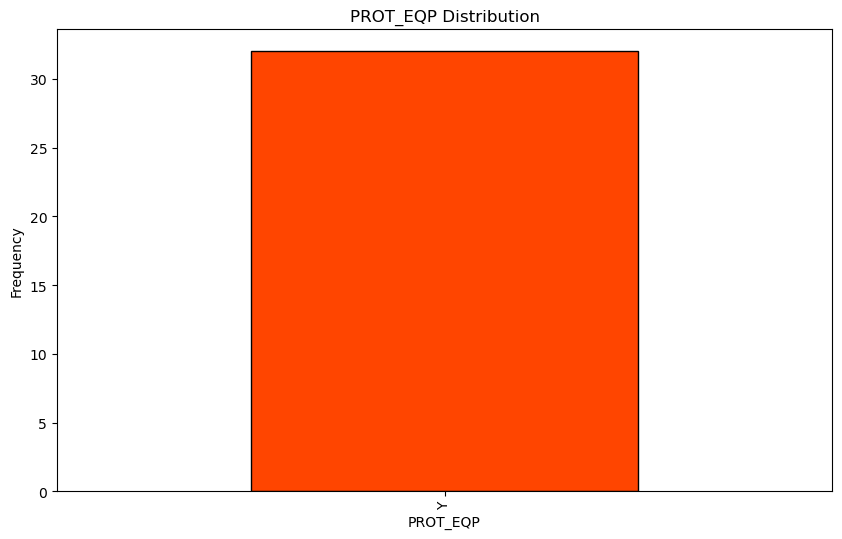

Saved PROT_EQP distribution bar chart to /home/jovyan/work/004DISSERTATION/ff_visualization/PROT_EQP_distribution.png


In [16]:
def visualize_data(df):
    # 设置图表输出目录
    output_dir = os.path.join(os.getcwd(), 'ff_visualization')
    os.makedirs(output_dir, exist_ok=True)

    # 定义橘红色
    color = 'orangered'

    # 定义需要移除的值
    values_to_remove = ['N', 'U']

    # 绘制年龄分布图
    if 'AGE' in df.columns:
        plt.figure(figsize=(10, 6))
        df['AGE'].hist(bins=range(15, 101), edgecolor='black', color=color)
        plt.title('Age Distribution')
        plt.xlabel('Age')
        plt.ylabel('Frequency')
        plt.grid(False)
        age_hist_path = os.path.join(output_dir, 'age_distribution.png')
        plt.savefig(age_hist_path)
        plt.show()  # 显示图表
        plt.close()
        print(f"Saved age distribution histogram to {age_hist_path}")

    # 对每一列进行数据可视化
    columns_to_visualize = df.columns.tolist()
    for column in columns_to_visualize:
        if column == 'AGE':
            continue  # 已经绘制过年龄分布图
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            value_counts = df[column].value_counts()
            value_counts = value_counts[~value_counts.index.isin(values_to_remove)]  # 去掉特定的值
            value_counts = value_counts.sort_index(ascending=False)  # 按值从大到小排序
            if not value_counts.empty:
                plt.figure(figsize=(10, 6))
                value_counts.plot(kind='bar', edgecolor='black', color=color)
                plt.title(f'{column} Distribution')
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.grid(False)
                col_bar_path = os.path.join(output_dir, f'{column}_distribution.png')
                plt.savefig(col_bar_path)
                plt.show()  # 显示图表
                plt.close()
                print(f"Saved {column} distribution bar chart to {col_bar_path}")
            else:
                print(f"No data to visualize for column {column}")

process_and_visualize_ffcasualty()